In [1]:
import pandas as pd
import numpy as np

In [2]:
names = ["ID", "Clump Thickness", "Cell Size Uniformity",
         "Cell Shape Uniformity", "Marginal Adhesion", 
         "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin",
         "Normal Nucleoli", "Mitoses", "Class"]
df = pd.read_csv("breast-cancer-wisconsin.data", names=names)
df = df.replace("?", np.NAN)
df = df.drop_duplicates(keep="first")
df

,ID,Clump Thickness,Cell Size Uniformity,Cell Shape Uniformity,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [3]:
data = df.values
data = data.astype(dtype=np.float64, copy=False)
data = data[:, 1:]
data[:, -1] -= 2
data[:, -1] /= 2
data

array([[ 5.,  1.,  1., ...,  1.,  1.,  0.],
       [ 5.,  4.,  4., ...,  2.,  1.,  0.],
       [ 3.,  1.,  1., ...,  1.,  1.,  0.],
       ...,
       [ 5., 10., 10., ..., 10.,  2.,  1.],
       [ 4.,  8.,  6., ...,  6.,  1.,  1.],
       [ 4.,  8.,  8., ...,  4.,  1.,  1.]])

In [4]:
means = np.nanmean(data, axis=0, dtype=np.float64)
means

array([4.42691751, 3.13024602, 3.20115774, 2.82489146, 3.21128799,
       3.53777778, 3.43560058, 2.88277858, 1.59334298, 0.34442836])

In [5]:
for col in range(data.shape[1]):
    for row in range(data.shape[0]):
        if np.isnan(data[row, col]):
            data[row, col] = means[col]
df = pd.DataFrame(data=data, index=range(data.shape[0]), columns=names[1:])
df

,Clump Thickness,Cell Size Uniformity,Cell Shape Uniformity,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5.0,1.0,1.0,1.0,2.0,1.000000,3.0,1.0,1.0,0.0
1,5.0,4.0,4.0,5.0,7.0,10.000000,3.0,2.0,1.0,0.0
2,3.0,1.0,1.0,1.0,2.0,2.000000,3.0,1.0,1.0,0.0
3,6.0,8.0,8.0,1.0,3.0,4.000000,3.0,7.0,1.0,0.0
4,4.0,1.0,1.0,3.0,2.0,1.000000,3.0,1.0,1.0,0.0
5,8.0,10.0,10.0,8.0,7.0,10.000000,9.0,7.0,1.0,1.0
6,1.0,1.0,1.0,1.0,2.0,10.000000,3.0,1.0,1.0,0.0
7,2.0,1.0,2.0,1.0,2.0,1.000000,3.0,1.0,1.0,0.0
8,2.0,1.0,1.0,1.0,2.0,1.000000,1.0,1.0,5.0,0.0
9,4.0,2.0,1.0,1.0,2.0,1.000000,2.0,1.0,1.0,0.0


In [6]:
num_train = round(df.shape[0] * 0.75)
num_test = df.shape[0] - num_train

In [7]:
div = df.shape[0] // 4
num_train = 3 * div
train_inds = np.random.choice(range(df.shape[0]), size=num_train, replace=False)
test_inds = [i for i in range(df.shape[0]) if i not in train_inds]
train_data = df.iloc[train_inds.tolist(), :-1]
train_labels = df.iloc[train_inds.tolist(), -1]
test_data = df.iloc[test_inds, :-1]
test_labels = df.iloc[test_inds, -1]
test_data

,Clump Thickness,Cell Size Uniformity,Cell Shape Uniformity,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
5,8.0,10.0,10.0,8.0,7.0,10.0,9.0,7.0,1.0
11,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
12,5.0,3.0,3.0,3.0,2.0,3.0,4.0,4.0,1.0
14,8.0,7.0,5.0,10.0,7.0,9.0,5.0,5.0,4.0
17,4.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
18,10.0,7.0,7.0,6.0,4.0,10.0,4.0,1.0,2.0
20,7.0,3.0,2.0,10.0,5.0,10.0,5.0,4.0,4.0
26,3.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0
29,1.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,1.0
30,3.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0


In [8]:
from kNN import *

In [9]:
def single_validate(model, test_data, test_labels):
    gen_labels = model.classify(test_data)
    tn, fn, tp, fp = generate_confusion_matrix(test_labels, gen_labels)
    print("    True Negative:", tn)
    print("    False Negative:", fn)
    print("    True Positive:", tp)
    print("    False Positive", fp)
    acc = get_accuracy(tn, fn, tp, fp)
    print("    Accuracy:", acc)
    tpr = get_true_positive_rate(tp, fn)
    print("    True Positive Rate:", tpr)
    ppv = get_precision(tp, fp)
    print("    Positive Predictive Value:", ppv)
    tnr = get_true_negative_rate(tn, fp)
    print("    True Negative Rate:", tnr)
    f1 = get_f1_score(ppv, tpr)
    print("    F1 Score:", f1)

In [10]:
model = kNearestNeighbors(2, train_data, train_labels)
kvals = [2, 3, 4, 5, 6, 7, 8, 17, 33]
for k in kvals:
    print("k =", k)
    model.updateK(k)
    single_validate(model, test_data, test_labels)

k = 2
    True Negative: 112
    False Negative: 4
    True Positive: 57
    False Positive 2
    Accuracy: 0.9657142857142857
    True Positive Rate: 0.9344262295081968
    Positive Predictive Value: 0.9661016949152542
    True Negative Rate: 0.9824561403508771
    F1 Score: 0.95
k = 3
    True Negative: 112
    False Negative: 3
    True Positive: 58
    False Positive 2
    Accuracy: 0.9714285714285714
    True Positive Rate: 0.9508196721311475
    Positive Predictive Value: 0.9666666666666667
    True Negative Rate: 0.9824561403508771
    F1 Score: 0.9586776859504132
k = 4
    True Negative: 112
    False Negative: 3
    True Positive: 58
    False Positive 2
    Accuracy: 0.9714285714285714
    True Positive Rate: 0.9508196721311475
    Positive Predictive Value: 0.9666666666666667
    True Negative Rate: 0.9824561403508771
    F1 Score: 0.9586776859504132
k = 5
    True Negative: 112
    False Negative: 3
    True Positive: 58
    False Positive 2
    Accuracy: 0.9714285714285714

In [11]:
from decision_tree import *

In [12]:
for imp in ["gini", "entropy", "misclassification error"]:
    print("Impurity Measure: {}\n".format(imp))
    for depth in range(2, 11):
        print("    Max Depth: {}\n".format(depth))
        for thresh in np.arange(0, 0.6, 0.1):
            print("    Impurity Threshold: {}\n".format(thresh))
            treemodel = DecisionTree(train_data, train_labels, imp, thresh, depth)
            treemodel.train()
            #treemodel.print_tree()
            single_validate(treemodel, test_data, test_labels)
            print()

Impurity Measure: gini

    Max Depth: 2

    Impurity Threshold: 0.0

    True Negative: 113
    False Negative: 10
    True Positive: 51
    False Positive 1
    Accuracy: 0.9371428571428572
    True Positive Rate: 0.8360655737704918
    Positive Predictive Value: 0.9807692307692307
    True Negative Rate: 0.9912280701754386
    F1 Score: 0.9026548672566372

    Impurity Threshold: 0.1

    True Negative: 113
    False Negative: 10
    True Positive: 51
    False Positive 1
    Accuracy: 0.9371428571428572
    True Positive Rate: 0.8360655737704918
    Positive Predictive Value: 0.9807692307692307
    True Negative Rate: 0.9912280701754386
    F1 Score: 0.9026548672566372

    Impurity Threshold: 0.2

    True Negative: 113
    False Negative: 10
    True Positive: 51
    False Positive 1
    Accuracy: 0.9371428571428572
    True Positive Rate: 0.8360655737704918
    Positive Predictive Value: 0.9807692307692307
    True Negative Rate: 0.9912280701754386
    F1 Score: 0.9026548672566

    True Negative: 113
    False Negative: 7
    True Positive: 54
    False Positive 1
    Accuracy: 0.9542857142857143
    True Positive Rate: 0.8852459016393442
    Positive Predictive Value: 0.9818181818181818
    True Negative Rate: 0.9912280701754386
    F1 Score: 0.9310344827586207

    Impurity Threshold: 0.1

    True Negative: 113
    False Negative: 10
    True Positive: 51
    False Positive 1
    Accuracy: 0.9371428571428572
    True Positive Rate: 0.8360655737704918
    Positive Predictive Value: 0.9807692307692307
    True Negative Rate: 0.9912280701754386
    F1 Score: 0.9026548672566372

    Impurity Threshold: 0.2

    True Negative: 113
    False Negative: 10
    True Positive: 51
    False Positive 1
    Accuracy: 0.9371428571428572
    True Positive Rate: 0.8360655737704918
    Positive Predictive Value: 0.9807692307692307
    True Negative Rate: 0.9912280701754386
    F1 Score: 0.9026548672566372

    Impurity Threshold: 0.30000000000000004

    True Negative: 113

    True Negative: 113
    False Negative: 10
    True Positive: 51
    False Positive 1
    Accuracy: 0.9371428571428572
    True Positive Rate: 0.8360655737704918
    Positive Predictive Value: 0.9807692307692307
    True Negative Rate: 0.9912280701754386
    F1 Score: 0.9026548672566372

    Impurity Threshold: 0.30000000000000004

    True Negative: 113
    False Negative: 10
    True Positive: 51
    False Positive 1
    Accuracy: 0.9371428571428572
    True Positive Rate: 0.8360655737704918
    Positive Predictive Value: 0.9807692307692307
    True Negative Rate: 0.9912280701754386
    F1 Score: 0.9026548672566372

    Impurity Threshold: 0.4

    True Negative: 113
    False Negative: 10
    True Positive: 51
    False Positive 1
    Accuracy: 0.9371428571428572
    True Positive Rate: 0.8360655737704918
    Positive Predictive Value: 0.9807692307692307
    True Negative Rate: 0.9912280701754386
    F1 Score: 0.9026548672566372

    Impurity Threshold: 0.5

    True Negative: 11

    True Negative: 113
    False Negative: 10
    True Positive: 51
    False Positive 1
    Accuracy: 0.9371428571428572
    True Positive Rate: 0.8360655737704918
    Positive Predictive Value: 0.9807692307692307
    True Negative Rate: 0.9912280701754386
    F1 Score: 0.9026548672566372

    Max Depth: 8

    Impurity Threshold: 0.0

    True Negative: 112
    False Negative: 7
    True Positive: 54
    False Positive 2
    Accuracy: 0.9485714285714286
    True Positive Rate: 0.8852459016393442
    Positive Predictive Value: 0.9642857142857143
    True Negative Rate: 0.9824561403508771
    F1 Score: 0.923076923076923

    Impurity Threshold: 0.1

    True Negative: 112
    False Negative: 7
    True Positive: 54
    False Positive 2
    Accuracy: 0.9485714285714286
    True Positive Rate: 0.8852459016393442
    Positive Predictive Value: 0.9642857142857143
    True Negative Rate: 0.9824561403508771
    F1 Score: 0.923076923076923

    Impurity Threshold: 0.2

    True Negative: 112


    True Negative: 113
    False Negative: 13
    True Positive: 48
    False Positive 1
    Accuracy: 0.92
    True Positive Rate: 0.7868852459016393
    Positive Predictive Value: 0.9795918367346939
    True Negative Rate: 0.9912280701754386
    F1 Score: 0.8727272727272727

    Impurity Threshold: 0.5

    True Negative: 113
    False Negative: 13
    True Positive: 48
    False Positive 1
    Accuracy: 0.92
    True Positive Rate: 0.7868852459016393
    Positive Predictive Value: 0.9795918367346939
    True Negative Rate: 0.9912280701754386
    F1 Score: 0.8727272727272727

    Max Depth: 5

    Impurity Threshold: 0.0

    True Negative: 113
    False Negative: 8
    True Positive: 53
    False Positive 1
    Accuracy: 0.9485714285714286
    True Positive Rate: 0.8688524590163934
    Positive Predictive Value: 0.9814814814814815
    True Negative Rate: 0.9912280701754386
    F1 Score: 0.9217391304347826

    Impurity Threshold: 0.1

    True Negative: 113
    False Negative: 10
  

    True Negative: 113
    False Negative: 13
    True Positive: 48
    False Positive 1
    Accuracy: 0.92
    True Positive Rate: 0.7868852459016393
    Positive Predictive Value: 0.9795918367346939
    True Negative Rate: 0.9912280701754386
    F1 Score: 0.8727272727272727

    Impurity Threshold: 0.30000000000000004

    True Negative: 113
    False Negative: 13
    True Positive: 48
    False Positive 1
    Accuracy: 0.92
    True Positive Rate: 0.7868852459016393
    Positive Predictive Value: 0.9795918367346939
    True Negative Rate: 0.9912280701754386
    F1 Score: 0.8727272727272727

    Impurity Threshold: 0.4

    True Negative: 113
    False Negative: 13
    True Positive: 48
    False Positive 1
    Accuracy: 0.92
    True Positive Rate: 0.7868852459016393
    Positive Predictive Value: 0.9795918367346939
    True Negative Rate: 0.9912280701754386
    F1 Score: 0.8727272727272727

    Impurity Threshold: 0.5

    True Negative: 113
    False Negative: 13
    True Positive

In [13]:
from PCA import *

In [14]:
z_train_data = normalize(train_data)
z_test_data = normalize(test_data)

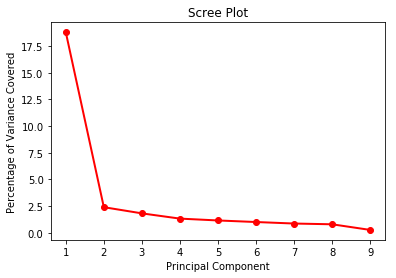

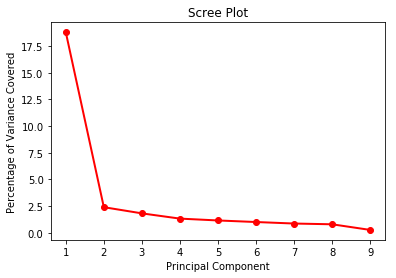

In [15]:
Utrain, Strain, Vtrain = get_svd(z_train_data)
Utest, Stest, Vtest = get_svd(z_train_data)
graph_scree(Strain)
graph_scree(Stest)

In [16]:
pca_train_data = reduce_data(Utrain, Strain, 2)
pca_test_data = reduce_data(Utest, Stest, 2)

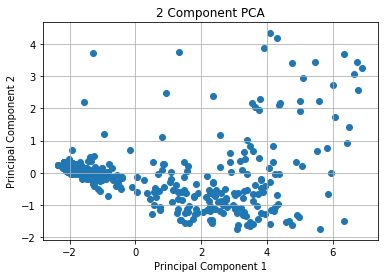

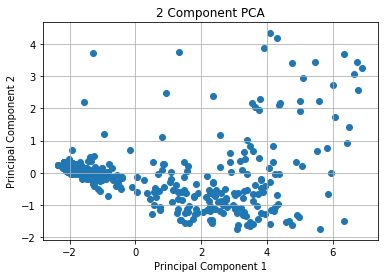

In [17]:
plot_2PC(pca_train_data)
plot_2PC(pca_test_data)

In [18]:
for k in range(2, 10):
    print("Reduced to {} features:".format(k))
    pca_train_data = reduce_data(Utrain, Strain, k)
    pca_test_data = reduce_data(Utest, Stest, k)
    for imp in ["gini", "entropy", "misclassification error"]:
        print("  Impurity Measure: {}\n".format(imp))
        for depth in range(2, 11):
            print("    Max Depth: {}\n".format(depth))
            for thresh in np.arange(0, 0.6, 0.1):
                print("    Impurity Threshold: {}\n".format(thresh))
                treemodel = DecisionTree(pca_train_data, train_labels, imp, thresh, depth)
                treemodel.train()
                single_validate(treemodel, pca_test_data, test_labels)
                print()

Reduced to 2 features:
  Impurity Measure: gini

    Max Depth: 2

    Impurity Threshold: 0.0

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.1

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.2

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
  

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.2

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.30000000000000004

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.4

    True Negative:

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.4

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Max Depth: 7

    Impurity Threshold: 0.0

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.1

    True Negativ

    True Negative: 88
    False Negative: 40
    True Positive: 21
    False Positive 26
    Accuracy: 0.6228571428571429
    True Positive Rate: 0.3442622950819672
    Positive Predictive Value: 0.44680851063829785
    True Negative Rate: 0.7719298245614035
    F1 Score: 0.38888888888888884

    Impurity Threshold: 0.1

    True Negative: 88
    False Negative: 40
    True Positive: 21
    False Positive 26
    Accuracy: 0.6228571428571429
    True Positive Rate: 0.3442622950819672
    Positive Predictive Value: 0.44680851063829785
    True Negative Rate: 0.7719298245614035
    F1 Score: 0.38888888888888884

    Impurity Threshold: 0.2

    True Negative: 88
    False Negative: 40
    True Positive: 21
    False Positive 26
    Accuracy: 0.6228571428571429
    True Positive Rate: 0.3442622950819672
    Positive Predictive Value: 0.44680851063829785
    True Negative Rate: 0.7719298245614035
    F1 Score: 0.38888888888888884

    Impurity Threshold: 0.30000000000000004

    True Negati

    True Negative: 88
    False Negative: 40
    True Positive: 21
    False Positive 26
    Accuracy: 0.6228571428571429
    True Positive Rate: 0.3442622950819672
    Positive Predictive Value: 0.44680851063829785
    True Negative Rate: 0.7719298245614035
    F1 Score: 0.38888888888888884

    Impurity Threshold: 0.30000000000000004

    True Negative: 88
    False Negative: 40
    True Positive: 21
    False Positive 26
    Accuracy: 0.6228571428571429
    True Positive Rate: 0.3442622950819672
    Positive Predictive Value: 0.44680851063829785
    True Negative Rate: 0.7719298245614035
    F1 Score: 0.38888888888888884

    Impurity Threshold: 0.4

    True Negative: 88
    False Negative: 40
    True Positive: 21
    False Positive 26
    Accuracy: 0.6228571428571429
    True Positive Rate: 0.3442622950819672
    Positive Predictive Value: 0.44680851063829785
    True Negative Rate: 0.7719298245614035
    F1 Score: 0.38888888888888884

    Max Depth: 10

    Impurity Threshold: 0

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.1

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.2

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.30000000000000004

    True Negative:

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Max Depth: 7

    Impurity Threshold: 0.0

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.1

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.2

    True Negativ

    True Negative: 88
    False Negative: 40
    True Positive: 21
    False Positive 26
    Accuracy: 0.6228571428571429
    True Positive Rate: 0.3442622950819672
    Positive Predictive Value: 0.44680851063829785
    True Negative Rate: 0.7719298245614035
    F1 Score: 0.38888888888888884

    Impurity Threshold: 0.1

    True Negative: 88
    False Negative: 40
    True Positive: 21
    False Positive 26
    Accuracy: 0.6228571428571429
    True Positive Rate: 0.3442622950819672
    Positive Predictive Value: 0.44680851063829785
    True Negative Rate: 0.7719298245614035
    F1 Score: 0.38888888888888884

    Impurity Threshold: 0.2

    True Negative: 88
    False Negative: 40
    True Positive: 21
    False Positive 26
    Accuracy: 0.6228571428571429
    True Positive Rate: 0.3442622950819672
    Positive Predictive Value: 0.44680851063829785
    True Negative Rate: 0.7719298245614035
    F1 Score: 0.38888888888888884

    Impurity Threshold: 0.30000000000000004

    True Negati

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.4

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Max Depth: 6

    Impurity Threshold: 0.0

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.1

    True Negativ

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.2

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.30000000000000004

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.4

    True Negative:

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.2

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.30000000000000004

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.4

    True Negative:

    True Negative: 88
    False Negative: 40
    True Positive: 21
    False Positive 26
    Accuracy: 0.6228571428571429
    True Positive Rate: 0.3442622950819672
    Positive Predictive Value: 0.44680851063829785
    True Negative Rate: 0.7719298245614035
    F1 Score: 0.38888888888888884

    Impurity Threshold: 0.2

    True Negative: 88
    False Negative: 40
    True Positive: 21
    False Positive 26
    Accuracy: 0.6228571428571429
    True Positive Rate: 0.3442622950819672
    Positive Predictive Value: 0.44680851063829785
    True Negative Rate: 0.7719298245614035
    F1 Score: 0.38888888888888884

    Impurity Threshold: 0.30000000000000004

    True Negative: 88
    False Negative: 40
    True Positive: 21
    False Positive 26
    Accuracy: 0.6228571428571429
    True Positive Rate: 0.3442622950819672
    Positive Predictive Value: 0.44680851063829785
    True Negative Rate: 0.7719298245614035
    F1 Score: 0.38888888888888884

    Impurity Threshold: 0.4

    True Negati

    True Negative: 88
    False Negative: 40
    True Positive: 21
    False Positive 26
    Accuracy: 0.6228571428571429
    True Positive Rate: 0.3442622950819672
    Positive Predictive Value: 0.44680851063829785
    True Negative Rate: 0.7719298245614035
    F1 Score: 0.38888888888888884

    Impurity Threshold: 0.2

    True Negative: 88
    False Negative: 40
    True Positive: 21
    False Positive 26
    Accuracy: 0.6228571428571429
    True Positive Rate: 0.3442622950819672
    Positive Predictive Value: 0.44680851063829785
    True Negative Rate: 0.7719298245614035
    F1 Score: 0.38888888888888884

    Impurity Threshold: 0.30000000000000004

    True Negative: 88
    False Negative: 40
    True Positive: 21
    False Positive 26
    Accuracy: 0.6228571428571429
    True Positive Rate: 0.3442622950819672
    Positive Predictive Value: 0.44680851063829785
    True Negative Rate: 0.7719298245614035
    F1 Score: 0.38888888888888884

    Impurity Threshold: 0.4

    True Negati

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.4

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Max Depth: 8

    Impurity Threshold: 0.0

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.1

    True Negativ

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.1

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.2

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.30000000000000004

    True Negative:

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.30000000000000004

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.4

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

  Impurity Measure: misclassification error

  

    True Negative: 88
    False Negative: 40
    True Positive: 21
    False Positive 26
    Accuracy: 0.6228571428571429
    True Positive Rate: 0.3442622950819672
    Positive Predictive Value: 0.44680851063829785
    True Negative Rate: 0.7719298245614035
    F1 Score: 0.38888888888888884

    Impurity Threshold: 0.4

    True Negative: 88
    False Negative: 40
    True Positive: 21
    False Positive 26
    Accuracy: 0.6228571428571429
    True Positive Rate: 0.3442622950819672
    Positive Predictive Value: 0.44680851063829785
    True Negative Rate: 0.7719298245614035
    F1 Score: 0.38888888888888884

    Max Depth: 8

    Impurity Threshold: 0.0

    True Negative: 88
    False Negative: 40
    True Positive: 21
    False Positive 26
    Accuracy: 0.6228571428571429
    True Positive Rate: 0.3442622950819672
    Positive Predictive Value: 0.44680851063829785
    True Negative Rate: 0.7719298245614035
    F1 Score: 0.38888888888888884

    Impurity Threshold: 0.1

    True Nega

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.30000000000000004

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.4

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Max Depth: 5

    Impurity Threshold: 0.0



    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.2

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.30000000000000004

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.4

    True Negative:

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.4

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Max Depth: 8

    Impurity Threshold: 0.0

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.1

    True Negativ

    True Negative: 88
    False Negative: 40
    True Positive: 21
    False Positive 26
    Accuracy: 0.6228571428571429
    True Positive Rate: 0.3442622950819672
    Positive Predictive Value: 0.44680851063829785
    True Negative Rate: 0.7719298245614035
    F1 Score: 0.38888888888888884

    Impurity Threshold: 0.1

    True Negative: 88
    False Negative: 40
    True Positive: 21
    False Positive 26
    Accuracy: 0.6228571428571429
    True Positive Rate: 0.3442622950819672
    Positive Predictive Value: 0.44680851063829785
    True Negative Rate: 0.7719298245614035
    F1 Score: 0.38888888888888884

    Impurity Threshold: 0.2

    True Negative: 88
    False Negative: 40
    True Positive: 21
    False Positive 26
    Accuracy: 0.6228571428571429
    True Positive Rate: 0.3442622950819672
    Positive Predictive Value: 0.44680851063829785
    True Negative Rate: 0.7719298245614035
    F1 Score: 0.38888888888888884

    Impurity Threshold: 0.30000000000000004

    True Negati

    True Negative: 88
    False Negative: 40
    True Positive: 21
    False Positive 26
    Accuracy: 0.6228571428571429
    True Positive Rate: 0.3442622950819672
    Positive Predictive Value: 0.44680851063829785
    True Negative Rate: 0.7719298245614035
    F1 Score: 0.38888888888888884

    Impurity Threshold: 0.4

    True Negative: 88
    False Negative: 40
    True Positive: 21
    False Positive 26
    Accuracy: 0.6228571428571429
    True Positive Rate: 0.3442622950819672
    Positive Predictive Value: 0.44680851063829785
    True Negative Rate: 0.7719298245614035
    F1 Score: 0.38888888888888884

Reduced to 7 features:
  Impurity Measure: gini

    Max Depth: 2

    Impurity Threshold: 0.0

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.4035087719298

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.4

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Max Depth: 7

    Impurity Threshold: 0.0

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.1

    True Negativ

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.2

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.30000000000000004

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.4

    True Negative:

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Max Depth: 9

    Impurity Threshold: 0.0

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.1

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.2

    True Negativ

    True Negative: 88
    False Negative: 40
    True Positive: 21
    False Positive 26
    Accuracy: 0.6228571428571429
    True Positive Rate: 0.3442622950819672
    Positive Predictive Value: 0.44680851063829785
    True Negative Rate: 0.7719298245614035
    F1 Score: 0.38888888888888884

    Impurity Threshold: 0.1

    True Negative: 88
    False Negative: 40
    True Positive: 21
    False Positive 26
    Accuracy: 0.6228571428571429
    True Positive Rate: 0.3442622950819672
    Positive Predictive Value: 0.44680851063829785
    True Negative Rate: 0.7719298245614035
    F1 Score: 0.38888888888888884

    Impurity Threshold: 0.2

    True Negative: 88
    False Negative: 40
    True Positive: 21
    False Positive 26
    Accuracy: 0.6228571428571429
    True Positive Rate: 0.3442622950819672
    Positive Predictive Value: 0.44680851063829785
    True Negative Rate: 0.7719298245614035
    F1 Score: 0.38888888888888884

    Impurity Threshold: 0.30000000000000004

    True Negati

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.2

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.30000000000000004

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.4

    True Negative:

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.2

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.30000000000000004

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.4

    True Negative:

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.2

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.30000000000000004

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.4

    True Negative:

    True Negative: 88
    False Negative: 40
    True Positive: 21
    False Positive 26
    Accuracy: 0.6228571428571429
    True Positive Rate: 0.3442622950819672
    Positive Predictive Value: 0.44680851063829785
    True Negative Rate: 0.7719298245614035
    F1 Score: 0.38888888888888884

    Impurity Threshold: 0.1

    True Negative: 88
    False Negative: 40
    True Positive: 21
    False Positive 26
    Accuracy: 0.6228571428571429
    True Positive Rate: 0.3442622950819672
    Positive Predictive Value: 0.44680851063829785
    True Negative Rate: 0.7719298245614035
    F1 Score: 0.38888888888888884

    Impurity Threshold: 0.2

    True Negative: 88
    False Negative: 40
    True Positive: 21
    False Positive 26
    Accuracy: 0.6228571428571429
    True Positive Rate: 0.3442622950819672
    Positive Predictive Value: 0.44680851063829785
    True Negative Rate: 0.7719298245614035
    F1 Score: 0.38888888888888884

    Impurity Threshold: 0.30000000000000004

    True Negati

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.4

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Max Depth: 3

    Impurity Threshold: 0.0

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.1

    True Negativ

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Max Depth: 9

    Impurity Threshold: 0.0

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.1

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.2

    True Negativ

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Max Depth: 5

    Impurity Threshold: 0.0

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.1

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.2

    True Negativ

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.2

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.30000000000000004

    True Negative: 84
    False Negative: 38
    True Positive: 23
    False Positive 30
    Accuracy: 0.6114285714285714
    True Positive Rate: 0.3770491803278688
    Positive Predictive Value: 0.4339622641509434
    True Negative Rate: 0.7368421052631579
    F1 Score: 0.40350877192982454

    Impurity Threshold: 0.4

    True Negative:

    True Negative: 88
    False Negative: 40
    True Positive: 21
    False Positive 26
    Accuracy: 0.6228571428571429
    True Positive Rate: 0.3442622950819672
    Positive Predictive Value: 0.44680851063829785
    True Negative Rate: 0.7719298245614035
    F1 Score: 0.38888888888888884

    Impurity Threshold: 0.30000000000000004

    True Negative: 88
    False Negative: 40
    True Positive: 21
    False Positive 26
    Accuracy: 0.6228571428571429
    True Positive Rate: 0.3442622950819672
    Positive Predictive Value: 0.44680851063829785
    True Negative Rate: 0.7719298245614035
    F1 Score: 0.38888888888888884

    Impurity Threshold: 0.4

    True Negative: 88
    False Negative: 40
    True Positive: 21
    False Positive 26
    Accuracy: 0.6228571428571429
    True Positive Rate: 0.3442622950819672
    Positive Predictive Value: 0.44680851063829785
    True Negative Rate: 0.7719298245614035
    F1 Score: 0.38888888888888884

    Max Depth: 8

    Impurity Threshold: 0.